In [1]:
import pandas as pd
import numpy as np
import requests
import pprint
import sidrapy
import warnings 
warnings.simplefilter("ignore")
from unidecode import unidecode

In [2]:
df = pd.read_excel("Tabela 1612.xlsx")

In [3]:
df["Município"] = df["Município"].str[:-5]

In [4]:
df["Município"] = df["Município"].fillna(method = 'ffill')

In [ ]:
df["Município"] = df["Município"].apply(lambda x: unidecode(x).lower().title())

In [6]:
df = df.replace("-", np.nan)
df = df.replace("X", np.nan)
df = df.replace("...", np.nan)
df = df.replace("..", np.nan)

In [7]:
df.shape[0]

10935

In [8]:
df = df[df['Rendimento médio da produção (Quilogramas por Hectare)'].notna()]

In [9]:
df.groupby("Município").sum(numeric_only=True).sort_values(by = 'Quantidade produzida (Toneladas)', ascending = False)

,Ano,Área plantada (Hectares),Área colhida (Hectares),Quantidade produzida (Toneladas),Rendimento médio da produção (Quilogramas por Hectare),Valor da produção (Mil Reais)
Município,,,,,,
Tupancireta,44275.0,3030518.0,3028318.0,7415324.0,53411.0,7980437.0
Palmeira Das Missoes,44275.0,2090400.0,2090400.0,5420846.0,57120.0,5919752.0
Cruz Alta,44275.0,1907100.0,1903630.0,4855859.0,55594.0,5353706.0
Julio De Castilhos,44275.0,1830900.0,1830700.0,4592080.0,54611.0,5316596.0
Cachoeira Do Sul,44275.0,1907912.0,1903062.0,4382068.0,48339.0,4958090.0
...,...,...,...,...,...,...
Santa Tereza,8014.0,15.0,15.0,19.0,5133.0,10.0
Picada Cafe,16124.0,8.0,8.0,16.0,16000.0,17.0
Harmonia,6009.0,9.0,9.0,12.0,3999.0,8.0


In [10]:
df.rename({
    'Área plantada (Hectares)': 'area_plantada(ha)',
    'Área colhida (Hectares)': 'area_colhida(ha)',
    'Quantidade produzida (Toneladas)': 'producao(t)',
    'Rendimento médio da produção (Quilogramas por Hectare)': 'produtividade(kg/ha)',
    'Valor da produção (Mil Reais)':  'valor_mil(R$)'
}, axis = 1, inplace = True)

Calcular a diferença entre áreas plantadas e colhidas

In [11]:
df["delta_area"] = df['area_plantada(ha)'] - df['area_colhida(ha)']

Calcular o valor médio da saca de soja

In [12]:
df['valor_saca'] = (df['valor_mil(R$)'] / ((df['producao(t)'] / 60))).round(2)

In [13]:
df.head()

,Município,Ano,area_plantada(ha),area_colhida(ha),producao(t),produtividade(kg/ha),valor_mil(R$),delta_area,valor_saca
0,Acegua,2002.0,100.0,100.0,126.0,1260.0,55.0,0.0,26.19
1,Acegua,2003.0,750.0,750.0,945.0,1260.0,624.0,0.0,39.62
2,Acegua,2004.0,750.0,750.0,945.0,1260.0,650.0,0.0,41.27
3,Acegua,2005.0,2000.0,2000.0,480.0,240.0,204.0,0.0,25.50
4,Acegua,2006.0,2000.0,2000.0,2400.0,1200.0,920.0,0.0,23.00


In [14]:
mer = df[['Município', 'Ano', 'area_plantada(ha)',
       'area_colhida(ha)', 'delta_area', 'producao(t)', 'produtividade(kg/ha)', 'valor_mil(R$)', 'valor_saca']]

In [15]:
mer.to_csv("soja_IBGE_RS_munic.csv")

In [161]:
mer = pd.read_csv("soja_IBGE_RS_munic.csv")

In [162]:
mer["var_produtividade"] = mer["produtividade(kg/ha)"].diff()
mer["var_produtividade_%"] = mer["produtividade(kg/ha)"].pct_change()
mer["var_producao(t)"] = mer["produtividade(kg/ha)"].diff()
mer["var_producao(t)_%"] = mer["produtividade(kg/ha)"].pct_change()

# Importar as variáveis climátivas

# Upload do histórico da variação da temperatura média da superfícia do Oceano Pacífico

Os eventos de El Nino e La nina ocorrem quando há 5 ocorrências de temperaturas 0,5 acima (El Niño) ou abaixo (La Niña) do padrão. Os dados disponíveis nesse dataset

Estudos mostraram que uma condição necessária para o desenvolvimento e persistência da convecção profunda (aumento da nebulosidade e da precipitação) nos Trópicos é que a temperatura da superfície do mar (SST) local seja de 28 °C ou superior. Uma vez que o padrão de convecção profunda é alterado devido a SSTs anômalas, a circulação atmosférica tropical e subtropical se ajusta ao novo padrão de aquecimento tropical, resultando em padrões anômalos de precipitação e temperatura que se estendem muito além da região do Pacífico equatorial. Uma anomalia de SST de +0,5 °C na região do Niño 3.4 é suficiente para atingir esse limite entre o final de março e meados de junho. Durante o restante do ano, uma anomalia de SST maior, chegando a +1,5 °C nos meses de novembro, dezembro e janeiro, é necessária para atingir o limiar que sustenta a convecção profunda persistente nessa região.

In [163]:
enso = pd.read_excel("Temp_media_2010_2025.xlsx")

### Aplicando os ajustes para fazer a fusão entre as bases do IBGE e do NOOA

In [164]:
enso.rename(columns = {"Year": "Ano"}, inplace = True)

In [165]:
mer = mer[mer['Ano'].notna()]

In [166]:
mer["Ano"] = mer["Ano"].astype(int)

In [167]:
mer = mer.merge(enso[["Ano", 'Media_mar_jun', 'Dez', 'Media_semestre_1',
       'Media_semestre_2','Evento_mar_jun', 'Evento_nov_dez_jan']], on = "Ano", how = "inner")

In [168]:
""" 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

mer['Evento_mar_jun_num'] = le.fit_transform(mer['Evento_mar_jun'])
mer['Evento_nov_dez_jan_num'] = le.fit_transform(mer['Evento_nov_dez_jan'])
"""

" \nfrom sklearn.preprocessing import LabelEncoder\n\nle = LabelEncoder()\n\nmer['Evento_mar_jun_num'] = le.fit_transform(mer['Evento_mar_jun'])\nmer['Evento_nov_dez_jan_num'] = le.fit_transform(mer['Evento_nov_dez_jan'])\n"

In [169]:
mer.groupby('Evento_mar_jun').sum(numeric_only=True)

,Unnamed: 0,Ano,area_plantada(ha),area_colhida(ha),delta_area,producao(t),produtividade(kg/ha),valor_mil(R$),valor_saca,var_produtividade,var_produtividade_%,var_producao(t),var_producao(t)_%,Media_mar_jun,Dez,Media_semestre_1,Media_semestre_2
Evento_mar_jun,,,,,,,,,,,,,,,,,
El nino,6886721,2524891,16571436.0,16518088.0,53348.0,50408275.0,3838257.0,55072812.0,81958.67,179013.0,88.684052,179013.0,88.684052,885.625,1036.8,1076.350000,800.783333
La nina,8961488,3313868,20375104.0,20201450.0,173654.0,49188327.0,4019356.0,97313867.0,180991.11,-177035.0,209.514647,-177035.0,209.514647,-1306.125,-1439.7,-1516.433333,-1191.516667
Neutro,33088154,12177220,68542657.0,67859270.0,683387.0,151197411.0,13206560.0,148061893.0,323924.10,362.0,1525.113009,362.0,1525.113009,-87.100,627.4,-216.700000,667.916667


In [170]:
prec = pd.read_csv("media_pluviometrica_RS.csv", sep = ";")

In [171]:
prec.rename({"Estacao": "Município"}, axis = 1, inplace = True)

In [172]:
mer = mer.merge(prec, on = ["Ano", "Município"], how = "left")
mer.rename({'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)': "precipitacao_media"}, axis = 1, inplace = True)

In [173]:
coord = pd.read_csv(r"C:\Users\DellVostro\OneDrive\Documentos\XP\Projeto_aplicado\Enso\Shapefiles\municipios.csv")

In [174]:
coord.rename({"nome": "Município"}, axis = 1, inplace = True)
coord["Município"] = coord["Município"].apply(lambda x: unidecode(x).lower().title())

In [176]:
mer = mer.merge(coord[['Município', 'latitude', 'longitude']], on= 'Município', how = 'inner')

In [177]:
import numpy
munic = np.array(mer["Município"])
ano = np.array(mer['Ano'])
latitudes = np.array(mer["latitude"])
longitudes = np.array(mer["longitude"])
pluviosidade = np.array(mer["precipitacao_media"])

In [20]:
from sklearn.cluster import DBSCAN


# Dados de coordenadas
coords = np.column_stack([latitudes, longitudes])

# Clusterização por proximidade (ajuste 'eps' para definir a distância máxima)
clustering = DBSCAN(eps=0.3, min_samples=2).fit(coords)
labels = clustering.labels_

# Atribuir a pluviosidade média do cluster a cada município
df_1 = pd.DataFrame({'lat': latitudes, 'lon': longitudes, "Ano": ano, "Município": munic, 'pluv': pluviosidade, 'cluster': labels})
df_1['pluv_media_cluster'] = df_1.groupby(['Ano', 'cluster'])['pluv'].transform('mean')

In [21]:
df_1[df_1["Ano"] == 2020]

,lat,lon,Ano,Município,pluv,cluster,pluv_media_cluster
18,-31.8665,-54.1615,2020,Acegua,NaN,0,NaN
40,-28.1672,-52.0310,2020,Agua Santa,NaN,1,770.52
56,-29.6447,-53.2515,2020,Agudo,NaN,1,770.52
78,-28.2342,-53.7757,2020,Ajuricaba,NaN,1,770.52
100,-27.6579,-54.7649,2020,Alecrim,NaN,1,770.52
...,...,...,...,...,...,...,...
9593,-27.3686,-53.4919,2020,Vista Alegre,NaN,1,770.52
9615,-28.8052,-51.7947,2020,Vista Alegre Do Prata,NaN,1,770.52
9637,-27.2902,-53.6974,2020,Vista Gaucha,NaN,1,770.52
9659,-28.3516,-54.5040,2020,Vitoria Das Missoes,NaN,1,770.52


In [22]:
df_1_g = df_1.groupby("Ano").mean(numeric_only=True)

In [23]:
df_1 = df_1.merge(df_1_g, on = "Ano")

In [24]:
df_1.columns

Index(['lat_x', 'lon_x', 'Ano', 'Município', 'pluv_x', 'cluster_x',
       'pluv_media_cluster_x', 'lat_y', 'lon_y', 'pluv_y', 'cluster_y',
       'pluv_media_cluster_y'],
      dtype='object')

In [25]:
df_1['pluv_media_cluster_x'].fillna(df_1['pluv_media_cluster_y'], inplace = True)

In [26]:
df_1 = df_1.rename(columns=lambda x: x.replace('_x', '') if x.endswith('_x') else x)

In [27]:
cols_to_drop = df_1.filter(regex='_y$').columns
df_1 = df_1.drop(columns=cols_to_drop)

In [28]:
mer.shape[0]

9684

In [32]:
df_1.columns

Index(['lat', 'lon', 'Ano', 'Município', 'pluv', 'cluster',
       'pluv_media_cluster'],
      dtype='object')

In [34]:
mer = mer.merge(df_1[[ 'Ano', "Município", 'pluv_media_cluster']])

In [36]:
mer["precipitacao_media"].fillna(mer["pluv_media_cluster"], inplace = True)

In [44]:
mer.drop_duplicates(["Município", "Ano"], inplace = True)

In [79]:
mer[mer['delta_area'] != 0][["Ano", "area_plantada(ha)", "area_colhida(ha)", "delta_area", "delta_area(%)"]].sort_values(by = "delta_area(%)", ascending=False)

,Ano,area_plantada(ha),area_colhida(ha),delta_area,delta_area(%)
8868,2005,300.0,15.0,285.0,0.950000
5220,2022,20400.0,2040.0,18360.0,0.900000
4089,2005,900.0,90.0,810.0,0.900000
9927,2012,7000.0,700.0,6300.0,0.900000
7771,2005,1650.0,200.0,1450.0,0.878788
...,...,...,...,...,...
4271,2022,6450.0,6438.0,12.0,0.001860
2931,2005,17000.0,16970.0,30.0,0.001765
5137,2005,8080.0,8070.0,10.0,0.001238
5517,2023,53000.0,52950.0,50.0,0.000943


In [ ]:
mer[["area_plantada(ha)", "area_colhida(ha)", "delta_area"]]

,area_plantada(ha),area_colhida(ha),delta_area,delta_area(%)
0,100.0,100.0,0.0,0.0
1,750.0,750.0,0.0,0.0
2,750.0,750.0,0.0,0.0
3,2000.0,2000.0,0.0,0.0
4,2000.0,2000.0,0.0,0.0
...,...,...,...,...
11783,50.0,50.0,0.0,0.0
11784,50.0,50.0,0.0,0.0
11785,50.0,50.0,0.0,0.0
11786,130.0,130.0,0.0,0.0


In [74]:
mer["delta_area(%)"] = mer['delta_area'] / mer["area_plantada(ha)"]

In [47]:
nino = mer[(mer["Evento_mar_jun"] == "El nino") | (mer["Evento_mar_jun"] == "Neutro")]
nina = mer[(mer["Evento_mar_jun"] == "La nina") | (mer["Evento_mar_jun"] == "Neutro")]

In [36]:
mer = mer[['area_plantada(ha)', 'area_colhida(ha)',
       'delta_area', 'producao(t)', 'produtividade(kg/ha)', 'valor_mil(R$)',
       'valor_saca', 'var_produtividade', 'var_produtividade_%',
       'var_producao(t)', 'var_producao(t)_%', 'Media_mar_jun', 'Dez',
       'Media_semestre_1', 'Media_semestre_2', 
        'precipitacao_media']]

# Verificando as variáveis que mais influenciam na variância com o PCA

In [100]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [109]:
mer = mer[mer["produtividade(kg/ha)"].notna()]
mer = mer[mer["valor_mil(R$)"].notna()]

In [111]:
mer.columns

Index(['Unnamed: 0', 'Município', 'Ano', 'area_plantada(ha)',
       'area_colhida(ha)', 'delta_area', 'producao(t)', 'produtividade(kg/ha)',
       'valor_mil(R$)', 'valor_saca', 'var_produtividade',
       'var_produtividade_%', 'var_producao(t)', 'var_producao(t)_%',
       'Media_mar_jun', 'Dez', 'Media_semestre_1', 'Media_semestre_2',
       'Evento_mar_jun', 'Evento_nov_dez_jan', 'precipitacao_media',
       'latitude', 'longitude', 'pluv_media_cluster', 'delta_area(%)'],
      dtype='object')

In [116]:
X_PCA = mer[['area_colhida(ha)', 'delta_area', 'produtividade(kg/ha)',
       'valor_saca', 'Media_mar_jun', 'Dez', 'Media_semestre_1', 'Media_semestre_2','precipitacao_media']]  # ou escolha colunas específicas

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_PCA)

pca = PCA(n_components=2) #número de componentes
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())  # total de variância explicada

df_final = pd.concat([mer.reset_index(drop=True), df_pca], axis=1)
componentes_df = pd.DataFrame(
    pca.components_,
    columns=X_PCA.columns,
    index=["PC1", "PC2"]
)
for pc in componentes_df.index:
    print(f"\nVariáveis mais influentes em {pc}:")
    print(componentes_df.loc[pc].sort_values(ascending=False).head(5))

[0.31213926 0.16630768]
0.4784469370812315

Variáveis mais influentes em PC1:
Media_mar_jun         0.523785
Media_semestre_2      0.477783
Dez                   0.468742
Media_semestre_1      0.422669
precipitacao_media    0.263130
Name: PC1, dtype: float64

Variáveis mais influentes em PC2:
valor_saca              0.531573
precipitacao_media      0.480227
produtividade(kg/ha)    0.477940
Dez                     0.180898
area_colhida(ha)        0.143562
Name: PC2, dtype: float64


### Aplicando métodos de aprendizando de máquina, começando pela regressão linear

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [57]:
X = nino[['Media_mar_jun']] #variável independente
y = nino[['precipitacao_media']] #variável dependente

In [58]:
X.shape

(7307, 1)

In [59]:
y.shape

(7307, 1)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = X)

In [61]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [62]:
y_pred = modelo.predict(X_test)

In [63]:
print(f"R²: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")

R²: 0.07
RMSE: 359.37


In [403]:
y_pred.shape[0]

75

In [82]:
mer.head(10)

,Unnamed: 0,Ano,area_plantada(ha),area_colhida(ha),delta_area,producao(t),produtividade(kg/ha),valor_mil(R$),valor_saca,var_produtividade,...,Media_mar_jun,Media_semestre_1,Media_semestre_2,Evento_mar_jun,Evento_nov_dez_jan,ONI,Evento_mar_jun_num,Evento_nov_dez_jan_num,Precipitacao_out_mai,precipitacao_media
0,0,2002,100.0,100.0,0.0,126.0,1260.0,55.0,26.19,NaN,...,0.350,0.216667,1.050000,Neutro,Neutro,0,2,2,5490.0,1098.00
1,1,2003,750.0,750.0,0.0,945.0,1260.0,624.0,39.62,0.0,...,-0.025,0.233333,0.283333,Neutro,Neutro,0,2,2,4847.8,969.56
2,2,2004,750.0,750.0,0.0,945.0,1260.0,650.0,41.27,0.0,...,0.225,0.266667,0.650000,Neutro,Neutro,0,2,2,2405.4,481.08
3,3,2005,2000.0,2000.0,0.0,480.0,240.0,204.0,25.50,-1020.0,...,0.300,0.400000,-0.333333,Neutro,Neutro,0,2,2,3215.8,643.16
4,4,2006,2000.0,2000.0,0.0,2400.0,1200.0,920.0,23.00,960.0,...,-0.275,-0.466667,0.583333,Neutro,Neutro,-1,2,2,4194.4,838.88
5,5,2007,2000.0,2000.0,0.0,3160.0,1580.0,2054.0,39.00,380.0,...,-0.325,-0.066667,-1.150000,Neutro,La nina,-2,2,1,5916.0,1183.20
6,6,2008,2000.0,2000.0,0.0,3480.0,1740.0,2429.0,41.88,160.0,...,-0.925,-1.133333,-0.416667,La nina,Neutro,-3,1,2,4413.2,882.64
7,7,2009,2100.0,2100.0,0.0,3675.0,1750.0,2542.0,41.50,10.0,...,-0.150,-0.366667,0.966667,Neutro,El nino,-1,2,0,6007.6,1201.52
8,8,2010,2100.0,2100.0,0.0,3675.0,1750.0,2235.0,36.49,0.0,...,0.075,0.500000,-1.450000,Neutro,La nina,3,2,1,4925.8,985.16
9,9,2011,5000.0,5000.0,0.0,12000.0,2400.0,8650.0,43.25,650.0,...,-0.650,-0.866667,-0.833333,La nina,Neutro,-3,1,2,4264.8,852.96


In [68]:
y_test.shape[0]

1705

In [76]:
X_train

,Media_semestre_2
5258,-1.450000
2177,-0.583333
294,1.050000
3020,0.316667
3326,-1.450000
...,...
9428,1.616667
1075,0.583333
1087,0.550000
4168,0.200000


In [73]:
X_test

,Media_semestre_2
9169,2.200000
5488,0.966667
1854,-0.416667
9852,-0.333333
3187,0.550000
...,...
1956,-0.333333
840,1.050000
6573,1.050000
5275,0.583333


In [ ]:
mer["produtividade"]

In [66]:
mer[['Evento_nov_dez_jan', 'Evento_nov_dez_jan_num']]

,Evento_nov_dez_jan,Evento_nov_dez_jan_num
0,Neutro,2
1,Neutro,2
2,Neutro,2
3,Neutro,2
4,Neutro,2
...,...,...
10432,Neutro,2
10433,Neutro,2
10434,Neutro,2
10435,Neutro,2


### arvore de decisao

In [64]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

### Influência das variações de temperatura do oceâno pacífico no regime de precipitação

#### Média entre março e junho e precipitação média

In [84]:
from sklearn.tree import export_text

X = mer[['Media_mar_jun']]  # variáveis explicativas
y = mer["precipitacao_media"] # variável alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree = DecisionTreeRegressor(max_depth=4, random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")

tree_rules = export_text(tree, feature_names=list(X.columns))
print(tree_rules)


R²: 0.397
RMSE: 268.60
|--- Media_mar_jun <= 0.33
|   |--- Media_mar_jun <= -0.21
|   |   |--- Media_mar_jun <= -0.30
|   |   |   |--- Media_mar_jun <= -0.48
|   |   |   |   |--- value: [1014.39]
|   |   |   |--- Media_mar_jun >  -0.48
|   |   |   |   |--- value: [1142.95]
|   |   |--- Media_mar_jun >  -0.30
|   |   |   |--- value: [452.82]
|   |--- Media_mar_jun >  -0.21
|   |   |--- Media_mar_jun <= 0.04
|   |   |   |--- Media_mar_jun <= 0.00
|   |   |   |   |--- value: [1244.09]
|   |   |   |--- Media_mar_jun >  0.00
|   |   |   |   |--- value: [1540.22]
|   |   |--- Media_mar_jun >  0.04
|   |   |   |--- Media_mar_jun <= 0.06
|   |   |   |   |--- value: [760.09]
|   |   |   |--- Media_mar_jun >  0.06
|   |   |   |   |--- value: [1106.64]
|--- Media_mar_jun >  0.33
|   |--- Media_mar_jun <= 0.76
|   |   |--- Media_mar_jun <= 0.65
|   |   |   |--- Media_mar_jun <= 0.48
|   |   |   |   |--- value: [1293.75]
|   |   |   |--- Media_mar_jun >  0.48
|   |   |   |   |--- value: [1338.86]
|

#### Média nov-dez-jan e precipitação média

In [82]:
X = mer[['Dez']] # variáveis explicativas
y = mer["precipitacao_media"] # variável alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree = DecisionTreeRegressor(max_depth=4, random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")

tree_rules = export_text(tree, feature_names=list(X.columns))
print(tree_rules)

R²: 0.451
RMSE: 256.29
|--- Dez <= 1.35
|   |--- Dez <= 0.85
|   |   |--- Dez <= 0.75
|   |   |   |--- Dez <= -1.40
|   |   |   |   |--- value: [1204.71]
|   |   |   |--- Dez >  -1.40
|   |   |   |   |--- value: [1086.31]
|   |   |--- Dez >  0.75
|   |   |   |--- value: [1245.26]
|   |--- Dez >  0.85
|   |   |--- Dez <= 1.00
|   |   |   |--- value: [452.82]
|   |   |--- Dez >  1.00
|   |   |   |--- value: [801.39]
|--- Dez >  1.35
|   |--- Dez <= 1.80
|   |   |--- value: [1534.63]
|   |--- Dez >  1.80
|   |   |--- Dez <= 2.30
|   |   |   |--- value: [1737.43]
|   |   |--- Dez >  2.30
|   |   |   |--- value: [1540.84]



In [97]:
mer.columns

Index(['Unnamed: 0', 'Município', 'Ano', 'area_plantada(ha)',
       'area_colhida(ha)', 'delta_area', 'producao(t)', 'produtividade(kg/ha)',
       'valor_mil(R$)', 'valor_saca', 'var_produtividade',
       'var_produtividade_%', 'var_producao(t)', 'var_producao(t)_%',
       'Media_mar_jun', 'Dez', 'Media_semestre_1', 'Media_semestre_2',
       'Evento_mar_jun', 'Evento_nov_dez_jan', 'precipitacao_media',
       'latitude', 'longitude', 'pluv_media_cluster', 'delta_area(%)'],
      dtype='object')

####  Árvore de decisão - Precipitação média e produtividade

In [98]:
X = mer[['valor_saca','precipitacao_media']] # variáveis explicativas
y = mer["produtividade(kg/ha)"] # variável alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree = DecisionTreeRegressor(max_depth=4, random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")

tree_rules = export_text(tree, feature_names=list(X.columns))
print(tree_rules)

R²: 0.538
RMSE: 609.65
|--- precipitacao_media <= 1063.83
|   |--- valor_saca <= 58.51
|   |   |--- precipitacao_media <= 948.15
|   |   |   |--- precipitacao_media <= 917.40
|   |   |   |   |--- value: [1673.25]
|   |   |   |--- precipitacao_media >  917.40
|   |   |   |   |--- value: [2324.88]
|   |   |--- precipitacao_media >  948.15
|   |   |   |--- precipitacao_media <= 950.46
|   |   |   |   |--- value: [657.43]
|   |   |   |--- precipitacao_media >  950.46
|   |   |   |   |--- value: [1629.12]
|   |--- valor_saca >  58.51
|   |   |--- valor_saca <= 175.26
|   |   |   |--- valor_saca <= 107.53
|   |   |   |   |--- value: [2045.54]
|   |   |   |--- valor_saca >  107.53
|   |   |   |   |--- value: [3183.59]
|   |   |--- valor_saca >  175.26
|   |   |   |--- valor_saca <= 186.21
|   |   |   |   |--- value: [1390.61]
|   |   |   |--- valor_saca >  186.21
|   |   |   |   |--- value: [1925.35]
|--- precipitacao_media >  1063.83
|   |--- valor_saca <= 52.69
|   |   |--- precipitacao_med

In [89]:
#### Média mar-jun e produtividade

In [88]:
X = mer[['Media_mar_jun']] # variáveis explicativas
y = mer["produtividade(kg/ha)"] # variável alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree = DecisionTreeRegressor(max_depth=4, random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")

tree_rules = export_text(tree, feature_names=list(X.columns))
print(tree_rules)

R²: 0.351
RMSE: 722.33
|--- Media_mar_jun <= 0.48
|   |--- Media_mar_jun <= 0.26
|   |   |--- Media_mar_jun <= -0.79
|   |   |   |--- Media_mar_jun <= -0.96
|   |   |   |   |--- value: [1699.10]
|   |   |   |--- Media_mar_jun >  -0.96
|   |   |   |   |--- value: [1999.50]
|   |   |--- Media_mar_jun >  -0.79
|   |   |   |--- Media_mar_jun <= -0.48
|   |   |   |   |--- value: [3061.32]
|   |   |   |--- Media_mar_jun >  -0.48
|   |   |   |   |--- value: [2337.68]
|   |--- Media_mar_jun >  0.26
|   |   |--- Media_mar_jun <= 0.33
|   |   |   |--- value: [657.77]
|   |   |--- Media_mar_jun >  0.33
|   |   |   |--- value: [1923.42]
|--- Media_mar_jun >  0.48
|   |--- Media_mar_jun <= 0.65
|   |   |--- value: [3235.82]
|   |--- Media_mar_jun >  0.65
|   |   |--- Media_mar_jun <= 0.76
|   |   |   |--- value: [2968.65]
|   |   |--- Media_mar_jun >  0.76
|   |   |   |--- value: [2995.17]



#### Média nov-dez-jan e produtividade

In [86]:
X = mer[['Dez']] # variáveis explicativas
y = mer["produtividade(kg/ha)"] # variável alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree = DecisionTreeRegressor(max_depth=4, random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")

tree_rules = export_text(tree, feature_names=list(X.columns))
print(tree_rules)

R²: 0.341
RMSE: 728.04
|--- Dez <= -0.90
|   |--- Dez <= -1.10
|   |   |--- Dez <= -1.40
|   |   |   |--- value: [2457.13]
|   |   |--- Dez >  -1.40
|   |   |   |--- value: [2004.82]
|   |--- Dez >  -1.10
|   |   |--- value: [3151.47]
|--- Dez >  -0.90
|   |--- Dez <= -0.75
|   |   |--- value: [1203.99]
|   |--- Dez >  -0.75
|   |   |--- Dez <= 2.30
|   |   |   |--- Dez <= 0.85
|   |   |   |   |--- value: [2458.17]
|   |   |   |--- Dez >  0.85
|   |   |   |   |--- value: [1952.57]
|   |   |--- Dez >  2.30
|   |   |   |--- value: [2995.17]



In [80]:
X = mer[['Media_mar_jun']] # variáveis explicativas
y = mer["delta_area(%)"] # variável alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree = DecisionTreeRegressor(max_depth=4, random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")

tree_rules = export_text(tree, feature_names=list(X.columns))
print(tree_rules)

R²: 0.144
RMSE: 0.06
|--- Media_mar_jun <= 0.26
|   |--- Media_mar_jun <= -0.96
|   |   |--- value: [0.03]
|   |--- Media_mar_jun >  -0.96
|   |   |--- Media_mar_jun <= -0.48
|   |   |   |--- Media_mar_jun <= -0.79
|   |   |   |   |--- value: [0.00]
|   |   |   |--- Media_mar_jun >  -0.79
|   |   |   |   |--- value: [0.00]
|   |   |--- Media_mar_jun >  -0.48
|   |   |   |--- Media_mar_jun <= -0.34
|   |   |   |   |--- value: [0.01]
|   |   |   |--- Media_mar_jun >  -0.34
|   |   |   |   |--- value: [0.00]
|--- Media_mar_jun >  0.26
|   |--- Media_mar_jun <= 0.33
|   |   |--- value: [0.13]
|   |--- Media_mar_jun >  0.33
|   |   |--- Media_mar_jun <= 0.76
|   |   |   |--- Media_mar_jun <= 0.65
|   |   |   |   |--- value: [0.00]
|   |   |   |--- Media_mar_jun >  0.65
|   |   |   |   |--- value: [0.01]
|   |   |--- Media_mar_jun >  0.76
|   |   |   |--- value: [0.00]



# Vamos testar o Random Forest para tentar pegar relações mais complexas

In [120]:
from sklearn.ensemble import RandomForestRegressor

In [131]:
mer_prec = mer.drop_duplicates("precipitacao_media")

In [156]:
X = mer[['Media_mar_jun']] # variáveis explicativas
y = mer["precipitacao_media"] # variável alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train, y_train) 

y_pred = forest.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")

R²: 0.523
RMSE: 237.46


In [138]:
mer.shape[0]

8949

In [137]:
len(y_pred)

1790

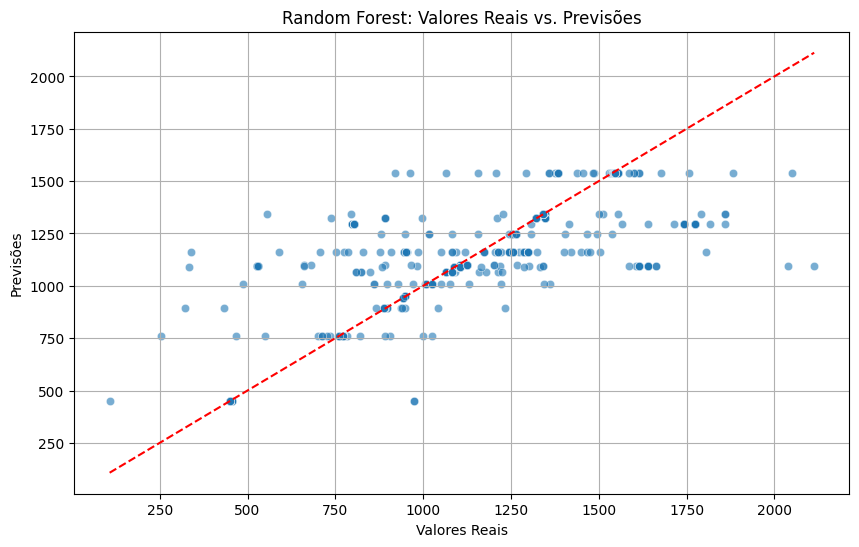

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.title("Random Forest: Valores Reais vs. Previsões")
plt.grid(True)
plt.show()

### Criar DataFrame de cenários (usando a média mar-jun como variável)

In [157]:
cenarios = pd.DataFrame({
    "Cenario": ["El Nino Forte", "El Nino Moderado", "Neutro", "La Niña Moderado", "La Niña Forte"],
    "Media_mar_jun": [2.0, 1.2, 0.0, -1.2, -2.0]
})

In [158]:
# Gerar previsões
cenarios["Precipitacao_Prevista"] = forest.predict(cenarios[["Media_mar_jun"]])

# Mostrar resultados
print(cenarios[["Cenario", "Media_mar_jun", "Precipitacao_Prevista"]])

            Cenario  Media_mar_jun  Precipitacao_Prevista
0     El Nino Forte            2.0            1540.988032
1  El Nino Moderado            1.2            1540.988032
2            Neutro            0.0             942.286026
3  La Niña Moderado           -1.2            1008.589792
4     La Niña Forte           -2.0            1008.589792


In [159]:
X = mer[['Dez']] # variáveis explicativas
y = mer["precipitacao_media"] # variável alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train, y_train) 

y_pred = forest.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")

R²: 0.595
RMSE: 218.72


In [160]:
cenarios_dez = pd.DataFrame({
    "Cenario": ["El Nino Forte", "El Nino Moderado", "Neutro", "La Niña Moderado", "La Niña Forte"],
    "Dez": [2.0, 1.2, 0.0, -1.2, -2.0]
})

# Gerar previsões
cenarios_dez["Precipitacao_Prevista"] = forest.predict(cenarios_dez[["Dez"]])

# Mostrar resultados
print(cenarios_dez[["Cenario", "Dez", "Precipitacao_Prevista"]])

            Cenario  Dez  Precipitacao_Prevista
0     El Nino Forte  2.0            1740.671907
1  El Nino Moderado  1.2             801.747848
2            Neutro  0.0             943.082833
3  La Niña Moderado -1.2             759.203657
4     La Niña Forte -2.0            1208.051062


In [155]:
mer.columns

Index(['Unnamed: 0', 'Município', 'Ano', 'area_plantada(ha)',
       'area_colhida(ha)', 'delta_area', 'producao(t)', 'produtividade(kg/ha)',
       'valor_mil(R$)', 'valor_saca', 'var_produtividade',
       'var_produtividade_%', 'var_producao(t)', 'var_producao(t)_%',
       'Media_mar_jun', 'Dez', 'Media_semestre_1', 'Media_semestre_2',
       'Evento_mar_jun', 'Evento_nov_dez_jan', 'precipitacao_media',
       'latitude', 'longitude', 'pluv_media_cluster', 'delta_area(%)'],
      dtype='object')

In [154]:
# Gerar previsões
cenarios["Precipitacao_Prevista"] = forest.predict(cenarios_dez[["Dez"]])

# Mostrar resultados
print(cenarios[["Cenario", "Media_mar_jun", "Precipitacao_Prevista"]])

            Cenario  Media_mar_jun  Precipitacao_Prevista
0     El Nino Forte            2.0            1740.671907
1  El Nino Moderado            1.2             801.747848
2            Neutro            0.0             943.082833
3  La Niña Moderado           -1.2             759.203657
4     La Niña Forte           -2.0            1208.051062


In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=y_pred, x="Cenario", y="Precipitacao_Prevista", palette="coolwarm")
plt.title("Precipitação Prevista no RS por Cenário de ENSO")
plt.ylabel("Precipitação (mm)")
plt.xticks(rotation=45)
plt.show()

TypeError: Data source must be a DataFrame or Mapping, not <class 'numpy.ndarray'>.

<Figure size 1000x600 with 0 Axes>

In [230]:
importances = tree.feature_importances_
df_importancia = pd.DataFrame({
    "variavel": X.columns,
    "importancia": importances
}).sort_values(by="importancia", ascending=False)

print(df_importancia)

           variavel  importancia
2  Media_semestre_1     0.656440
3  Media_semestre_2     0.171553
1               Dez     0.138176
0     Media_mar_jun     0.033831


#### Influência das variações de temperatura do oceâno pacífico na produtividade da soja

In [232]:
mer = mer[mer['produtividade(kg/ha)'].notna()]

R²: -0.065
RMSE: 843.03


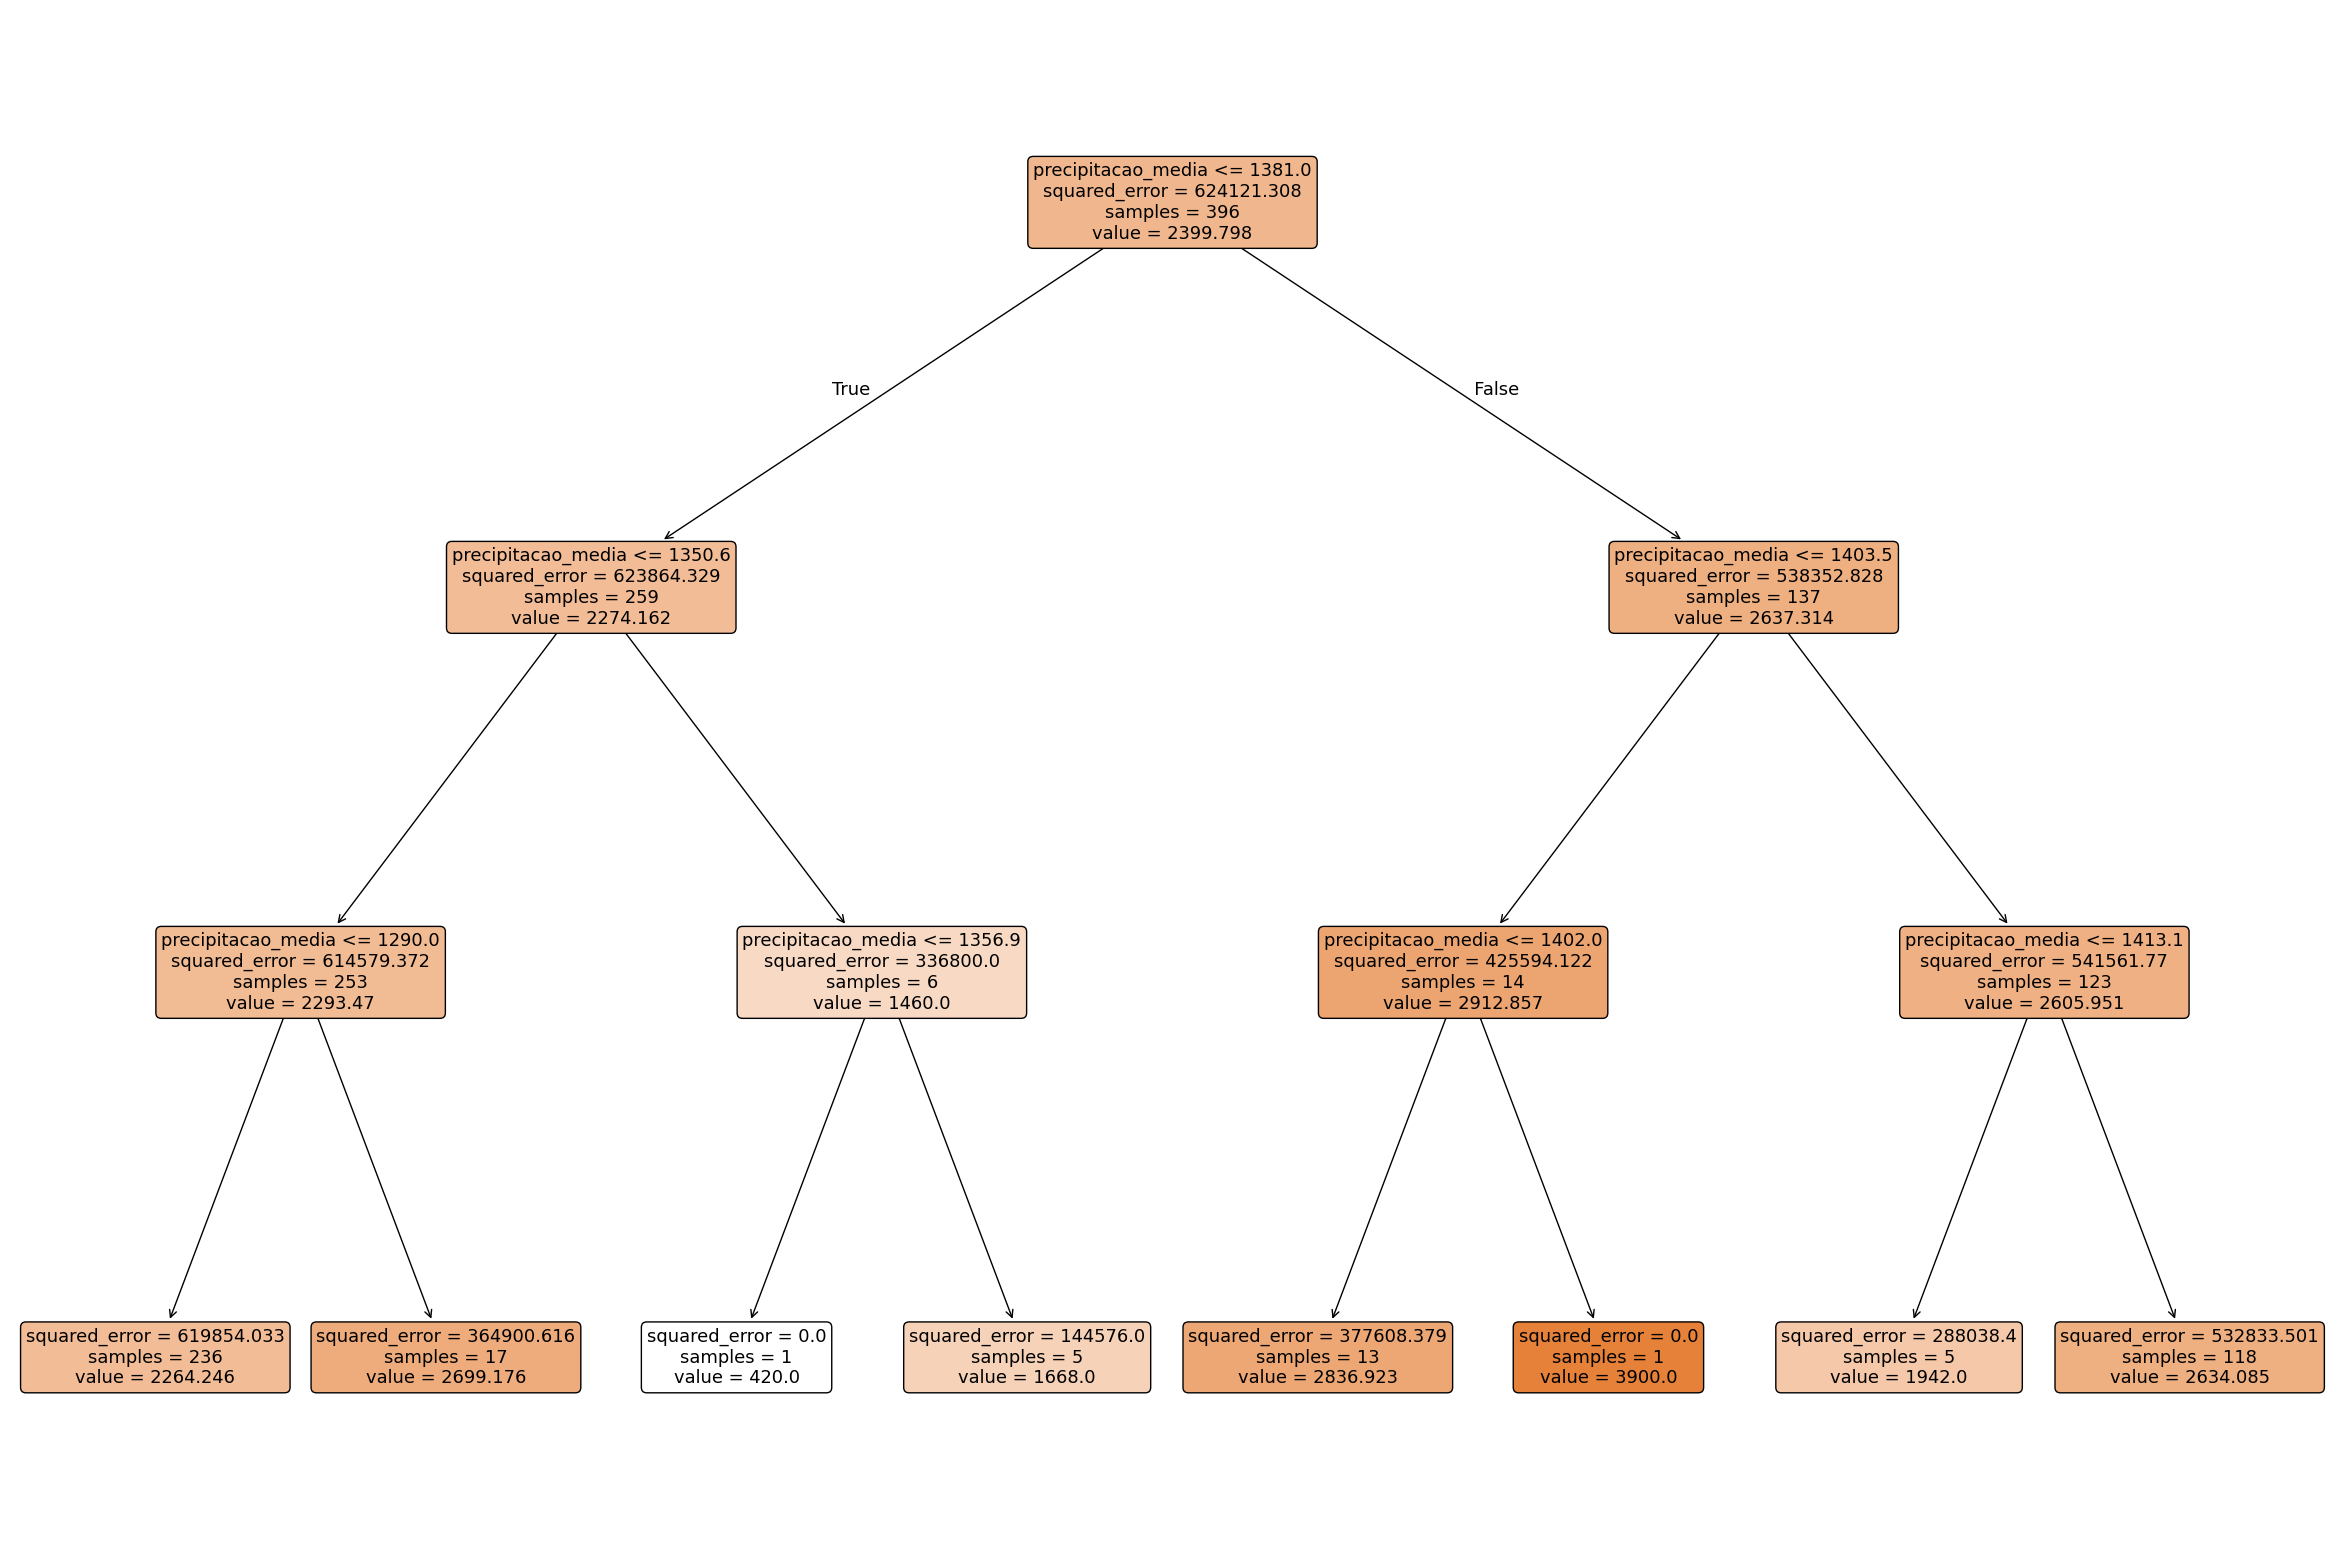

             variavel  importancia
0  precipitacao_media          1.0


In [439]:
X = mer[['precipitacao_media']]
y = mer['produtividade(kg/ha)']                 # variável alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree = DecisionTreeRegressor(max_depth=3, random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")

plt.figure(figsize=(30, 20))
plot_tree(tree, feature_names=X.columns, filled=True, rounded=True)
plt.show()

importances = tree.feature_importances_
df_importancia = pd.DataFrame({
    "variavel": X.columns,
    "importancia": importances
}).sort_values(by="importancia", ascending=False)

print(df_importancia)

In [440]:
from sklearn.tree import export_text

tree_rules = export_text(tree, feature_names=list(X.columns))
print(tree_rules)


|--- precipitacao_media <= 1381.00
|   |--- precipitacao_media <= 1350.60
|   |   |--- precipitacao_media <= 1290.00
|   |   |   |--- value: [2264.25]
|   |   |--- precipitacao_media >  1290.00
|   |   |   |--- value: [2699.18]
|   |--- precipitacao_media >  1350.60
|   |   |--- precipitacao_media <= 1356.90
|   |   |   |--- value: [420.00]
|   |   |--- precipitacao_media >  1356.90
|   |   |   |--- value: [1668.00]
|--- precipitacao_media >  1381.00
|   |--- precipitacao_media <= 1403.50
|   |   |--- precipitacao_media <= 1402.00
|   |   |   |--- value: [2836.92]
|   |   |--- precipitacao_media >  1402.00
|   |   |   |--- value: [3900.00]
|   |--- precipitacao_media >  1403.50
|   |   |--- precipitacao_media <= 1413.10
|   |   |   |--- value: [1942.00]
|   |   |--- precipitacao_media >  1413.10
|   |   |   |--- value: [2634.08]

